### Steps for following code

1. created data in excel of peoples with their age and income
2. scatter plot that data
3. apply KMeans _ cluster = 4 (clusters means groups of points)
4. add cluster column in data
5. now make 4 array and plot that 4 arrays with 4 different colors in age vs income graph
6. Due to large difference in scalling of x and y axis, make scale between 0-1
7. for that use MinMaxScaler
8. Again repeat from step 3-5
9. Now call cluster center function and plot that in graph.
10. After doing this all try changing values of clusters so that having proper clusters
11. change the cluster values from 1-10 and plot the graph of it.
12. check the elbow plot and take that cluster.
13. again go from step 3-5. This grph will be you final once

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("K-means_data.csv")
df.head()

,Name,Age,Income
0,Deepak,27,50000
1,Sanket,29,60000
2,Yash,29,80000
3,Atharva,31,70000
4,Ritesh,30,65000


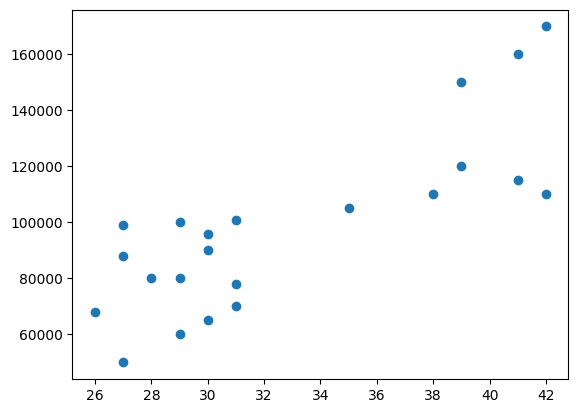

In [3]:
plt.scatter(df["Age"], df['Income'])

In [4]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([3, 3, 1, 3, 3, 1, 2, 3, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Deepak,27,50000,3
1,Sanket,29,60000,3
2,Yash,29,80000,1
3,Atharva,31,70000,3
4,Ritesh,30,65000,3


C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_18888\1321007622.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


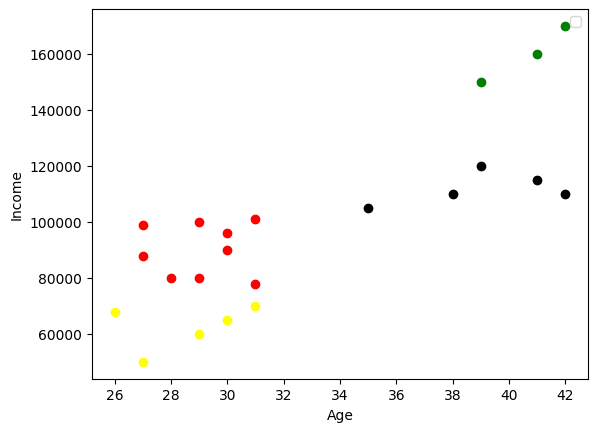

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Age, df1["Income"], color='green')
plt.scatter(df2.Age, df2["Income"], color='red')
plt.scatter(df3.Age, df3["Income"], color='black')
plt.scatter(df4.Age, df4["Income"], color='yellow')
# plt.scatter(km.cluster_center_[:,0])
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

## Convert the values of data between 0-1

In [76]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income,cluster
0,Deepak,0.0625,0.000000,2
1,Sanket,0.1875,0.083333,2
2,Yash,0.1875,0.250000,0
3,Atharva,0.3125,0.166667,2
4,Ritesh,0.2500,0.125000,2
5,Palak,0.3125,0.233333,0
6,Netrali,0.7500,0.500000,3
7,Om,0.0000,0.150000,2
8,Pranav,0.0625,0.316667,0
9,Prajwal,0.5625,0.458333,3


In [94]:
km = KMeans(n_clusters=4)
y_predicted  = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 3, 3, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int32)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_7548\4032853750.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


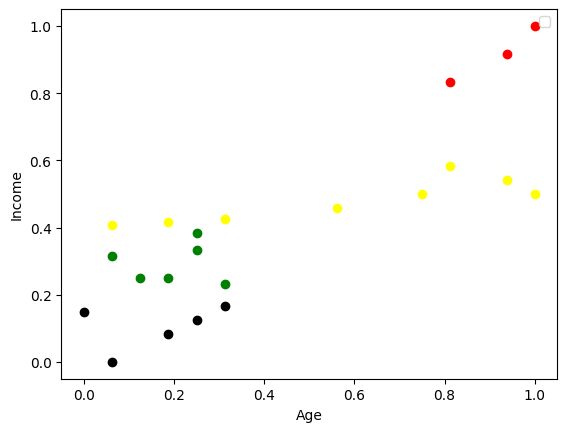

In [78]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Age, df1["Income"], color='green')
plt.scatter(df2.Age, df2["Income"], color='red')
plt.scatter(df3.Age, df3["Income"], color='black')
plt.scatter(df4.Age, df4["Income"], color='Yellow')
# plt.scatter(km.cluster_center_[:,0])
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

## PLotting K

In [79]:
km.cluster_centers_

array([[0.91666667, 0.91666667],
       [0.1796875 , 0.34791667],
       [0.8125    , 0.51666667],
       [0.1875    , 0.12638889]])

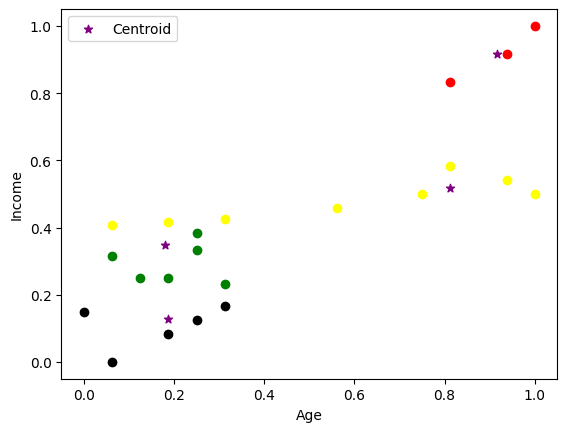

In [80]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Age, df1["Income"], color='green')
plt.scatter(df2.Age, df2["Income"], color='red')
plt.scatter(df3.Age, df3["Income"], color='black')
plt.scatter(df4.Age, df4["Income"], color='Yellow')
# Plotting X values :
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker= '*', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [81]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

In [82]:
sse

[4.005097853535353,
 0.8872271825396828,
 0.6902044270833332,
 0.36985937500000005,
 0.3233210358796295,
 0.21811342592592597,
 0.22195312500000003,
 0.13227285879629633,
 0.12896267361111113]

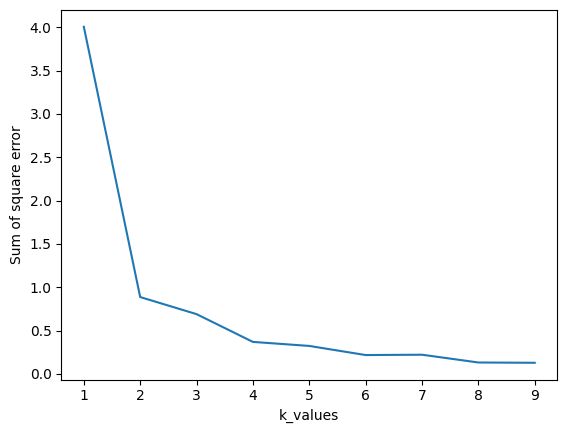

In [83]:
plt.xlabel('k_values')
plt.ylabel('Sum of square error')
plt.plot(k_range, sse)

In [89]:
km = KMeans(n_clusters=2)
y_predicted  = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int32)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_7548\1330870299.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


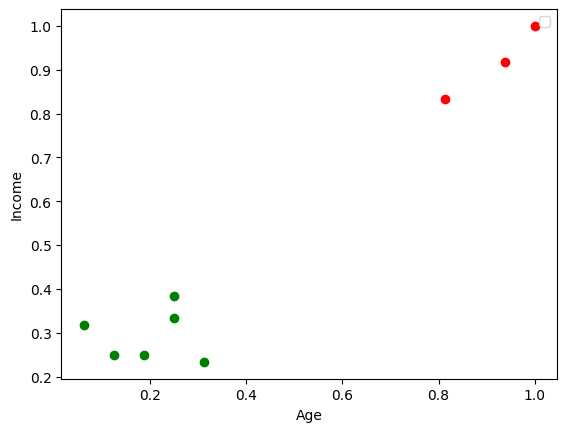

In [90]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Age, df1["Income"], color='green')
plt.scatter(df2.Age, df2["Income"], color='red')
# plt.scatter(km.cluster_center_[:,0])
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

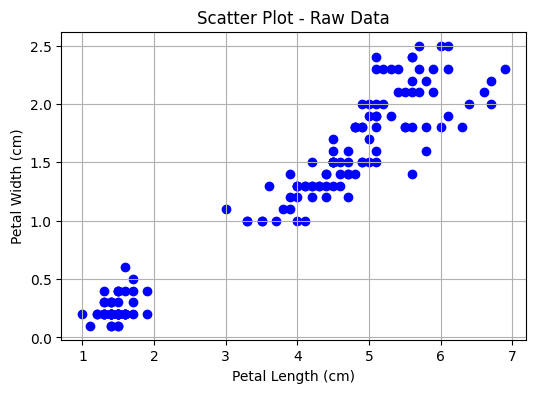

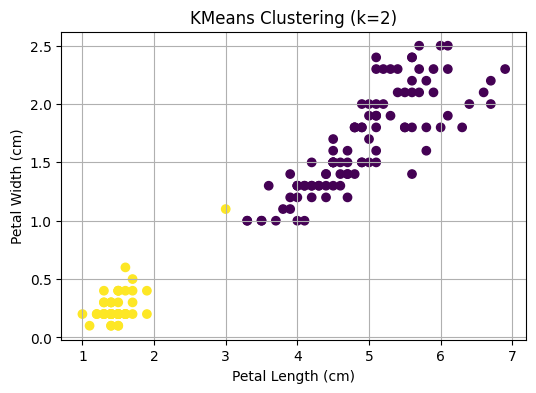

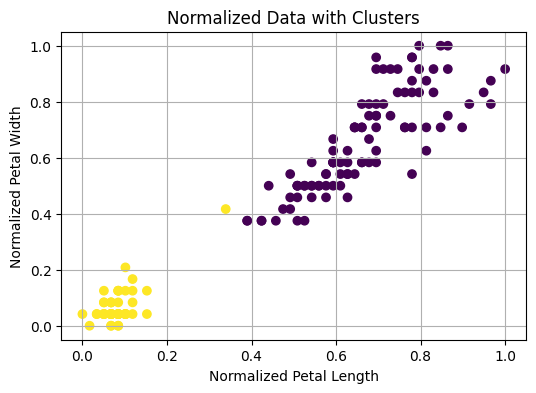

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select only Petal Length and Petal Width
df = df[['petal length (cm)', 'petal width (cm)']]

# Plot 1: Raw data scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='blue')
plt.title("Scatter Plot - Raw Data")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

# Apply KMeans clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Plot 2: Data with clusters
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'], cmap='viridis')
plt.title("KMeans Clustering (k=2)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

# Normalize the features between 0 and 1
scaler = MinMaxScaler()
df[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

# Plot 3: Normalized data with clusters
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'], cmap='viridis')
plt.title("Normalized Data with Clusters")
plt.xlabel("Normalized Petal Length")
plt.ylabel("Normalized Petal Width")
plt.grid(True)
plt.show()


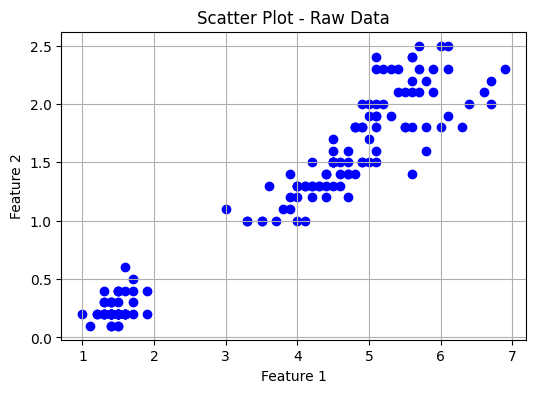

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_23580\3807923833.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df)


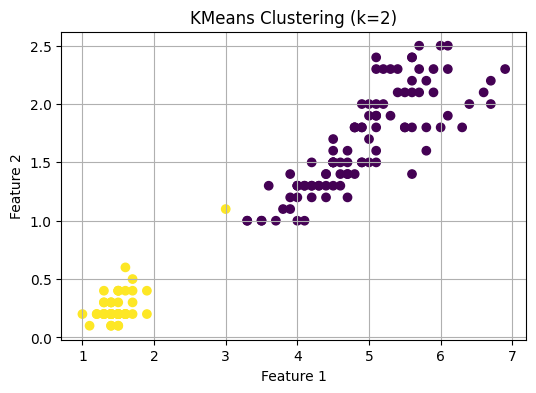

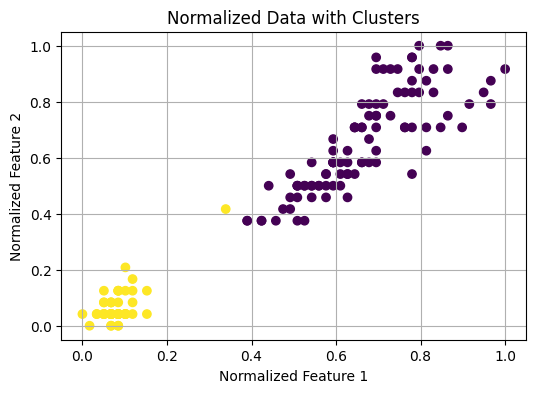

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data)

# Select only petal length and petal width (columns 2 and 3)
df = data.iloc[:, 2:4]

# Plot 1: Raw data scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='blue')
plt.title("Scatter Plot - Raw Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Plot 2: Data with clusters
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2], cmap='viridis')
plt.title("KMeans Clustering (k=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Normalize the first two columns (features)
scaler = MinMaxScaler()
df.iloc[:, 0:2] = scaler.fit_transform(df.iloc[:, 0:2])

# Plot 3: Normalized data with clusters
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2], cmap='viridis')
plt.title("Normalized Data with Clusters")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.grid(True)
plt.show()
